# K-means Assignment



1. Which dataset you’re using
2. Specification of your dataset
3. Pre-processing
4. How K-means / other clustering algorithm work
5. Result of implementation
6. Conclusion

### Data set
- URL: https://archive.ics.uci.edu/ml/datasets/seeds

### Attributes

1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

All of these parameters were real-valued continuous.

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [17]:
# Read the data set
column_names = ['area A', 'perimeter P', 'compactness C', 'length of kernel',
                'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'target']
original_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt',
                 sep='\t',
                 names=column_names)

original_data.head()

,area A,perimeter P,compactness C,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [18]:
# Check the missing values in the data set.
original_data.isnull().sum()


area A                     0
perimeter P                0
compactness C              3
length of kernel           0
width of kernel            1
asymmetry coefficient      0
length of kernel groove    4
target                     4
dtype: int64

In [19]:
# Remove the missing values in the data set.
clean_data = original_data.dropna()
clean_data.isnull().sum()

area A                     0
perimeter P                0
compactness C              0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
target                     0
dtype: int64

In [20]:
# Features selected to use with K-means
features = ['compactness C', 'length of kernel','width of kernel', 'asymmetry coefficient', 'length of kernel groove']
features

['compactness C',
 'length of kernel',
 'width of kernel',
 'asymmetry coefficient',
 'length of kernel groove']

In [21]:
x_features = clean_data.loc[:, features].values
x = StandardScaler().fit_transform(x_features)

# Get the column with the target values
y = clean_data['target'].astype(int)

In [22]:
is_present_nan = np.any(np.isnan(x))
is_present_finite = np.all(np.isfinite(x))
nan_positions = np.where(np.isnan(x))

print(f' Nan present: [{is_present_nan}], '
      f' Finite present: [{is_present_finite}], '
      f' Nan positions: [{nan_positions}]')

 Nan present: [False],  Finite present: [True],  Nan positions: [(array([], dtype=int64), array([], dtype=int64))]


In [23]:
# Create and execute K-means
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=1)

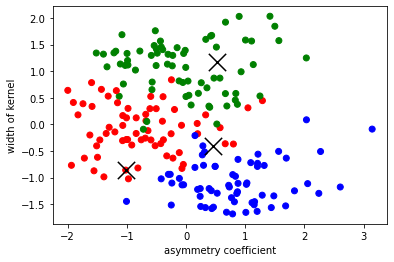

In [24]:
# Print the k-means result
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

x_label = 'asymmetry coefficient'
y_label = 'width of kernel'

cluster_colormap = np.array(['r', 'b', 'g'])
x_as_Df = pd.DataFrame(x, columns = features)
plt.scatter(x_as_Df[x_label], x_as_Df[y_label], c=cluster_colormap[labels])
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s = 300, marker = 'x', c = 'k')
plt.xlabel(x_label)
plt.ylabel(y_label);

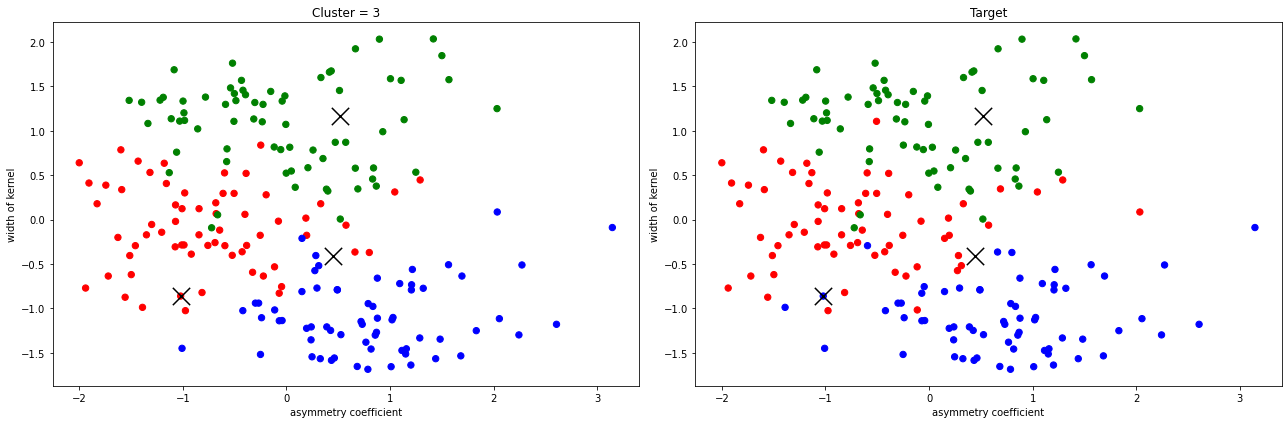

In [25]:
def print_plots_compare():
    plt.figure(figsize=(18,6))
    __create_kmeans_plot_results()
    __create_target_plot()
    plt.tight_layout()

def __create_kmeans_plot_results():
    clusters_colormap = np.array(['r', 'b', 'g'])[labels]
    __create_plot(1, 'Cluster = 3', clusters_colormap)

def __create_target_plot():
    target_colormap = np.array(['','r', 'g', 'b'])[y]
    __create_plot(2, 'Target', target_colormap)

def __create_plot(sub_plot, title, colormap_lables):
    plt.subplot(1, 2, sub_plot)
    plt.title(title)
    plt.scatter(x_as_Df[x_label], x_as_Df[y_label], c=colormap_lables, s=40)
    plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s = 300, marker = 'x', c = 'k')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

print_plots_compare()
